In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max_rows', None)
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


In [2]:
numerical = pd.read_csv('numerical.csv')
numerical

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,0,25.0,25.0,25.0,9,25.000000,184568,0,1,12
95408,1,48.000000,7,9,1,0,31,43,19,4,...,0,20.0,20.0,20.0,9,20.000000,122706,1,1,2
95409,1,60.000000,5,9,0,0,18,46,20,7,...,4,3.0,10.0,10.0,3,8.285714,189641,1,3,34
95410,0,58.000000,7,9,0,0,28,35,20,9,...,18,5.0,21.0,18.0,4,12.146341,4693,1,4,11


In [3]:
categorical = pd.read_csv('categorical.csv')
categorical

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,...,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,...,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,...,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,...,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,...,28,1,87,11,94,11,95,12,87,2
4,FL,16,H,F,3,L,F,A,S,2,...,20,1,93,10,96,1,96,1,79,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,other,27,H,M,3,L,G,C,C,2,...,0,2,96,2,96,2,96,2,96,2
95408,TX,24,H,M,3,L,F,A,C,1,...,50,1,96,3,96,3,96,3,96,3
95409,MI,30,H,M,3,L,E,B,C,3,...,38,1,96,3,95,1,96,10,94,10
95410,CA,24,H,F,2,L,F,A,C,1,...,40,5,90,11,96,8,97,1,86,12


In [4]:
target = pd.read_csv('target.csv')
target

,TARGET_B,TARGET_D
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
...,...,...
95407,0,0.0
95408,0,0.0
95409,0,0.0
95410,1,18.0


Apply the Random Forests algorithm but this time only by upscaling the data.


In [5]:
#joining all files in one dataframe
data = pd.concat([numerical, categorical, target], axis = 1)

#target_B is the variable to be predicted (0 = don't donate, 1 = donate)
data['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [6]:
#checking missing values
data.isnull().sum()

TCODE           0
AGE             0
INCOME          0
WEALTH1         0
HIT             0
               ..
LASTDATE_MM     0
FIRSTDATE_YR    0
FIRSTDATE_MM    0
TARGET_B        0
TARGET_D        0
Length: 339, dtype: int64

In [7]:
#X-y split
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

In [8]:
#Encoding
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(object)

display(categoricalX.head())

for col in categoricalX.columns:
    print(col, categoricalX[col].nunique())

print()

encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S


STATE 12
HOMEOWNR 2
GENDER 3
RFA_2R 1
RFA_2A 4
GEOCODE2 4
DOMAIN_A 5



In [9]:
#Train/test split before upsampling and then only upsample the training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# for upsampling we need to temporarily concat X_train and y_train
trainset = pd.concat([X_train, y_train], axis=1)

# Manual way to upsample category 1:
category_1 = trainset[trainset['TARGET_B']==1]
category_0 = trainset[trainset['TARGET_B']==0]

upsampled_category_1 = resample(category_1, replace=True, n_samples=len(category_0))
print(upsampled_category_1.shape)

trainset_new = pd.concat([category_0, upsampled_category_1], axis = 0)
trainset_new = trainset_new.sample(frac =1) #randomize the rows
X_train = trainset_new.drop(['TARGET_B'], axis=1)
y_train = trainset_new['TARGET_B']
print(X_train.shape)

(72486, 356)
(144972, 355)


In [11]:
X_test.shape

(19083, 355)

In [12]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

#Removing the column target_d from the set of features
X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)

In [13]:
#Random Forest
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 0)
clf.fit(X_train, y_train)

print("The R2 for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The R2 for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))

The R2 for the Random Forest in the TRAIN set is 0.63
The R2 for the Random Forest in the TEST  set is 0.61


0    18083
1     1000
Name: TARGET_B, dtype: int64

array([[11072,  7011],
       [  462,   538]])

In [14]:
#Cross Validation
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8)

cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)

print("The mean R2 of the folds was {:.2f}".format(np.mean(cross_val_scores)))

The mean R2 of the folds was 0.62


Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative?


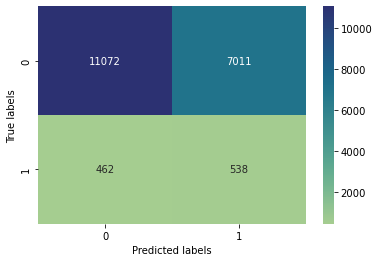

In [15]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap="crest")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [16]:
y_test

58053    0
9484     0
13395    0
1466     0
2076     0
        ..
94255    0
26449    0
1969     0
48574    0
73270    0
Name: TARGET_B, Length: 19083, dtype: int64

In [17]:
len(y_pred)

19083

In [18]:
new_df = pd.concat([y_test, pd.Series(y_pred, index=y_test.index), data.loc[y_test.index, 'TARGET_D']], axis=1)
new_df

,TARGET_B,0,TARGET_D
58053,0,1,0.0
9484,0,0,0.0
13395,0,0,0.0
1466,0,1,0.0
2076,0,0,0.0
...,...,...,...
94255,0,1,0.0
26449,0,0,0.0
1969,0,0,0.0
48574,0,1,0.0


In [19]:
new_df.columns = ['TARGET_B', 'PRED', 'TARGET_D']
new_df

,TARGET_B,PRED,TARGET_D
58053,0,1,0.0
9484,0,0,0.0
13395,0,0,0.0
1466,0,1,0.0
2076,0,0,0.0
...,...,...,...
94255,0,1,0.0
26449,0,0,0.0
1969,0,0,0.0
48574,0,1,0.0


In [20]:
new_df['TARGET_D'].isna().sum()

0

In [21]:
new_df['TARGET_D'].sum()

16101.029999999999

In [22]:
#FN > Predicted 0 but True label was 1
new_df.loc[(new_df['TARGET_B'] == 1) & (new_df['PRED'] == 0), 'TARGET_D'].sum()

9860.029999999999

In [23]:
#FP > Predicted 1 but True label was 0
# We know just how many people would donate, but we don't know how much.

In [24]:
#Overall, we can say that 7251 donors were predicted to donate when actually the wouldn't.
#Only 446 people weren't count as donators.
#Therefore with this model, the company would expect to receive more donations.

Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Please checkout make_scorer alogside with GridSearchCV in order to train the model to maximize the error metrics of interest in this case.

In [30]:
#Trying to max F1-score in this case, in order to balance precision and recall 
scorer = make_scorer(f1_score)

# New parameter grid for random forest
param_grid = {
    'n_estimators': [50, 100], 
    'min_samples_split': [2, 3], 
    'min_samples_leaf' : [1, 2],
    'max_depth':[3],
    'max_features': ['sqrt']
    }

# Random forest model
clf = RandomForestClassifier(random_state=0)

In [26]:
# GridSearchCV to find the best hyperparameters for F1 score
grid_search = GridSearchCV(clf, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters and F1 score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best F1 score: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score:  0.598221715138543


In [34]:
clf = RandomForestClassifier(max_depth=3,
                             min_samples_split=2,
                             min_samples_leaf = 1,
                             max_features = 'sqrt',
                             n_estimators=100,
                             random_state=0)


In [35]:
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=3, max_features='sqrt', random_state=0)

In [36]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("F1-Score: ", f1)

Accuracy:  0.5813551328407484
F1-Score:  0.12506844814368634


In [ ]:
#